# LOARD LIBRARIES

In [1]:
import os
import requests
from PIL import Image
from matplotlib import patches
from io import BytesIO
import matplotlib.pyplot as plt

# Setting Up Environment Variables For API Call

In [12]:
Key = "Password" #Here you replace Password with your service KEY
#If you want to hide your KEY as I did you can learn from this youtube video:https://www.youtube.com/watch?v=IolxqkL7cD8

Endpoint = 'https://delta-face.cognitiveservices.azure.com/face/v1.0/detect'

def config():
    print("Calling MS Cog Ser API Config")
    return Key, Endpoint

# Reading the Data

In [13]:
Path = '../Speech/'
Filename = 'OFAK.jpg'
Data_path = os.path.join(Path + Filename)
Dataset = open(Data_path, "rb")

# Calling MS Cog Ser API Config

In [14]:
Key, Endpoint = config();

Calling MS Cog Ser API Config


# Setting the Parameters 

In [15]:
Headers = {'Content-Type': 'application/octet-stream',
           'Ocp-Apim-Subscription-Key': Key}

Parameters = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion'}

In [16]:
Output_Data_Json = requests.post(Endpoint, params = Parameters, headers = Headers, data = Dataset)
Output_Data_Json.raise_for_status()
Face = Output_Data_Json.json()
print(Face)

[{'faceId': 'b91668c3-67ac-4cd0-8741-5ed615271f04', 'faceRectangle': {'top': 124, 'left': 137, 'width': 188, 'height': 188}, 'faceLandmarks': {'pupilLeft': {'x': 186.0, 'y': 178.8}, 'pupilRight': {'x': 276.3, 'y': 176.5}, 'noseTip': {'x': 230.3, 'y': 222.7}, 'mouthLeft': {'x': 193.2, 'y': 262.2}, 'mouthRight': {'x': 269.6, 'y': 262.1}, 'eyebrowLeftOuter': {'x': 156.9, 'y': 161.1}, 'eyebrowLeftInner': {'x': 209.3, 'y': 158.4}, 'eyeLeftOuter': {'x': 171.7, 'y': 182.9}, 'eyeLeftTop': {'x': 186.2, 'y': 175.2}, 'eyeLeftBottom': {'x': 186.7, 'y': 187.8}, 'eyeLeftInner': {'x': 201.0, 'y': 181.7}, 'eyebrowRightInner': {'x': 250.5, 'y': 156.8}, 'eyebrowRightOuter': {'x': 311.3, 'y': 155.9}, 'eyeRightInner': {'x': 258.8, 'y': 180.5}, 'eyeRightTop': {'x': 276.0, 'y': 172.4}, 'eyeRightBottom': {'x': 274.9, 'y': 185.7}, 'eyeRightOuter': {'x': 290.6, 'y': 179.8}, 'noseRootLeft': {'x': 220.7, 'y': 181.2}, 'noseRootRight': {'x': 243.6, 'y': 180.3}, 'noseLeftAlarTop': {'x': 210.8, 'y': 208.7}, 'noseRig

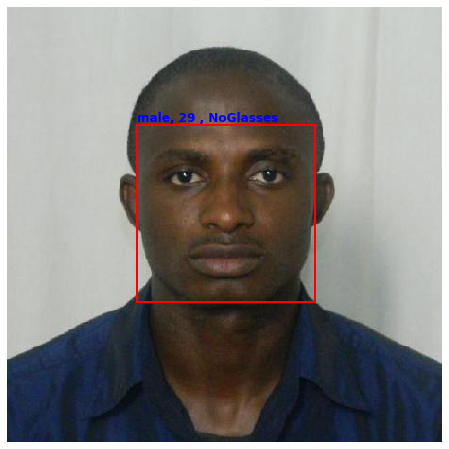

In [37]:
#Display the image
Data_origin = open(Data_path, "rb").read()
Actual_Data = Image.open(BytesIO(Data_origin))

plt.figure(figsize=(8, 8))
axises = plt.imshow(Actual_Data, alpha=1)
for face in Face:
    Shape = face["faceRectangle"]
    Attributes = face["faceAttributes"]
    Detail = (Shape["left"], Shape["top"])
    Clarity = patches.Rectangle(
        Detail, Shape["width"], Shape["height"], fill = False, linewidth = 2, color = 'r')
    plt.text(Detail[0], Detail[1], "%s, %d , %s" % (Attributes["gender"], 
                                                    Attributes["age"], Attributes["glasses"]),
             fontsize = 12, color = 'b', weight = "bold", va = "bottom")
    axises.axes.add_patch(Clarity)

_ = plt.axis("off")
plt.show()